In [977]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as matcolors
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
from itertools import chain
sns.set(font="DejaVu Sans")
color_list = sns.cubehelix_palette(n_colors=40, rot=1.8, start=4)
color_list = color_list.as_hex()

In [2]:
to_drop = ['educ1989', 'educflag', 'ageflag', 'age', 'ager52', 
           'ager12', 'ager22', 'eanum', 'brace', 'raceimp', 'racer3', 
           'racer5', 'hispanic', 'hspanicr', 'ucr358', 'ucr130', 'ucr39', 'econdp_1',
            'econds_1', 'enicon_1', 'econdp_2', 'econds_2', 'enicon_2', 'econdp_3',
            'econds_3', 'enicon_3', 'econdp_4', 'econds_4', 'enicon_4', 'econdp_5',
            'econds_5', 'enicon_5', 'econdp_6', 'econds_6', 'enicon_6', 'econdp_7', 'econds_7',
            'enicon_7', 'econdp_8', 'econds_8', 'enicon_8', 'econdp_9', 'econds_9',
            'enicon_9', 'econdp_10', 'econds_10', 'enicon_10', 'econdp_11', 'econds_11', 'enicon_11',
            'econdp_12', 'econds_12', 'enicon_12', 'econdp_13', 'econds_13', 'enicon_13',
            'econdp_14', 'econds_14', 'enicon_14', 'econdp_15', 'econds_15', 'enicon_15',
            'econdp_16', 'econds_16', 'enicon_16', 'econdp_17', 'econds_17', 'enicon_17',
            'econdp_18', 'econds_18', 'enicon_18', 'econdp_19', 'econds_19', 'enicon_19', 'econdp_20',
            'econds_20', 'enicon_20']

In [3]:
main_df = pd.DataFrame()

In [4]:
def clean_mort_file(file_path): 
    df = pd.read_csv(file_path)
    df.drop(columns=to_drop, inplace=True)
    df = df[df['ucod'].str.startswith('O')]
    return df

In [5]:
files_list = ['data/mort2009.csv', 'data/mort2010.csv', 
             'data/mort2011.csv', 'data/mort2012.csv', 
             'data/mort2013.csv', 'data/mort2014.csv', 
             'data/mort2015.csv', 'data/mort2016.csv', 
             'data/mort2017.csv', 'data/Mort2018US.PubUse.csv']

In [6]:
for file in files_list: 
    df = clean_mort_file(file)
    main_df = main_df.append(df)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106) have mixed types.Specify dtype option on import or set low_memory=False.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (63,66,69,72,75,78,81,84,99,100,101,102,103,104,105,106) have mixed types.Specify dtype option on import or set low_memory=False.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (63,66,69,72,75,78,81,84,99,100,101,102,103,104,105,106,107) have mixed types.Specify dtype option on import or set low_memory=False.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (60,63,66,69,72,99,100,101,102,103,104,105) have mixed types.Specify dtype option on import or set low_memory=False.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2

In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10561 entries, 2113 to 2844169
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   restatus   10561 non-null  int64  
 1   educ2003   9840 non-null   float64
 2   monthdth   10561 non-null  int64  
 3   sex        10561 non-null  object 
 4   ager27     10561 non-null  int64  
 5   placdth    10561 non-null  int64  
 6   marstat    10561 non-null  object 
 7   weekday    10561 non-null  int64  
 8   year       10561 non-null  int64  
 9   injwork    10561 non-null  object 
 10  mandeath   9693 non-null   float64
 11  methdisp   10561 non-null  object 
 12  autopsy    10561 non-null  object 
 13  activity   10 non-null     float64
 14  injury     297 non-null    float64
 15  ucod       10561 non-null  object 
 16  ucr113     10561 non-null  int64  
 17  ranum      10561 non-null  int64  
 18  record_1   10561 non-null  object 
 19  record_2   3990 non-null   object 
 20  r

In [8]:
percent_missing = main_df.isnull().sum() * 100 / len(main_df)
missing_value_df = pd.DataFrame({'column_name': main_df.columns,
                                 'percent_missing': percent_missing})

In [9]:
missing_value_df

,column_name,percent_missing
restatus,restatus,0.000000
educ2003,educ2003,6.827005
monthdth,monthdth,0.000000
sex,sex,0.000000
ager27,ager27,0.000000
placdth,placdth,0.000000
marstat,marstat,0.000000
weekday,weekday,0.000000
year,year,0.000000
injwork,injwork,0.000000


In [10]:
to_drop = ['record_6', 'record_7', 'record_8', 'record_9', 'record_10', 'record_11', 'record_12', 
          'record_13', 'record_14', 'record_15', 'record_16', 'record_17', 'record_18', 
          'record_19', 'record_20', 'activity', 'injury']

In [11]:
main_df.drop(to_drop, inplace=True, axis=1)

In [12]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10561 entries, 2113 to 2844169
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   restatus  10561 non-null  int64  
 1   educ2003  9840 non-null   float64
 2   monthdth  10561 non-null  int64  
 3   sex       10561 non-null  object 
 4   ager27    10561 non-null  int64  
 5   placdth   10561 non-null  int64  
 6   marstat   10561 non-null  object 
 7   weekday   10561 non-null  int64  
 8   year      10561 non-null  int64  
 9   injwork   10561 non-null  object 
 10  mandeath  9693 non-null   float64
 11  methdisp  10561 non-null  object 
 12  autopsy   10561 non-null  object 
 13  ucod      10561 non-null  object 
 14  ucr113    10561 non-null  int64  
 15  ranum     10561 non-null  int64  
 16  record_1  10561 non-null  object 
 17  record_2  3990 non-null   object 
 18  record_3  1564 non-null   object 
 19  record_4  671 non-null    object 
 20  record_5  286 non-null 

In [13]:
main_df.reset_index(inplace=True)

In [14]:
df = main_df.copy()

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9113 entries, 6 to 10560
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     9113 non-null   int64  
 1   restatus  9113 non-null   int64  
 2   educ2003  9113 non-null   float64
 3   monthdth  9113 non-null   int64  
 4   sex       9113 non-null   object 
 5   ager27    9113 non-null   int64  
 6   placdth   9113 non-null   int64  
 7   marstat   9113 non-null   object 
 8   weekday   9113 non-null   int64  
 9   year      9113 non-null   int64  
 10  injwork   9113 non-null   object 
 11  mandeath  9113 non-null   float64
 12  methdisp  9113 non-null   object 
 13  autopsy   9113 non-null   object 
 14  ucod      9113 non-null   object 
 15  ucr113    9113 non-null   int64  
 16  ranum     9113 non-null   int64  
 17  record_1  9113 non-null   object 
 18  record_2  9113 non-null   object 
 19  record_3  9113 non-null   object 
 20  record_4  9113 non-null   obj

In [660]:
#  fill NA as None string for records without additional information 



In [826]:
# create a dictionary for the causes involved in this chart
causes_dict = {'O268s': 'O268: Other Specified Pregnancy-Related Conditions(s)',
               'O998s': 'O998: Other Specified Diseases Complicating Pregnancy(s)',
               'O961s': 'O961: Indirect Obstetric Cause, 42d-365d post-delivery(s)',
               'O960s': 'O960: Direct Obstetric Cause, 42d-365d post-delivery(s)',
               'O994s': 'O994: Diseases of the Circulatory System(s)', 
                 'O903s': 'O903: Cardiomyopathy in the puerperium',
               
               'A419': 'A419: Sepsis, unspecified',
               'O881': 'O881: Amniotic Fluid Embolism',
                   'C509': 'C509: Breast Neoplasm, Unspecified',
               'C910': 'C910: Acute lymphoblastic leukaemia', 
                   'None': 'No Secondary Cause Reported',
                    'O960': 'O960: Direct Obstetric Cause, 42d-365d post-delivery',
                   'O268': 'O268: Other Specified Pregnancy-Related Conditions',
                   'R99': 'R99: Illness or Undefined Cause of Mortality',
                 'O961': 'O961: Indirect Obstetric Cause, 42d-365d post-delivery(s)',
               'F179': 'F179: Unspecified disorder due to use of tobacco',
               'F191': 'F191: Mental and behavioural disorders due to harmful use of other psychoactive substances', 
               'O998': 'O998: Other Specified Diseases Complicating Pregnancy', 
                   'O995': 'O995: Diseases of the Respiratory System',
                   'I499': 'I499: Cardiac Arrhythmia, Unspecified', 
                   'O998': 'O998: Other Specified Diseases Complicating Pregnancy',
                   'O961': 'O961: Indirect Obstetric Cause, 42d-365d post-delivery',
                   'O266': 'O266: Liver Disorder',
               'O721': 'O721: Other immediate postpartum haemorrhage', 
               'G931': 'G931: Anoxic brain damage, not elsewhere classified',
               'G932': 'G932: Benign intracranial hypertension',
               'G122': 'G122: Motor neuron disease', 
               'B24': 'B24: Unspecified HIV Disease', 
               'O985': 'O985: Other viral diseases complicating pregnancy, childbirth and the puerperium', 
               'O987': 'O987: HIV disease complicating pregnancy, childbirth and the puerperium', 
               'O903': 'O903: Cardiomyopathy in the puerperium',
               'O994': 'O994: Diseases of the Circulatory System',
               'I119': 'I119: Hypertensive heart disease without (congestive) heart failure',     
               'I219': 'I219: Acute myocardial infarction, unspecified',
                   'I269': 'I269: Pulmonary Embolism',
               'I330': 'I330: Acute and subacute infective endocarditis', 
               'I420': 'I420: Dilated cardiomyopathy',
               'I428': 'I428: Other cardiomyopathies', 
               'I429': 'I429: Cardiomyopathy, unspecified', 
               'J159': 'J159: Bacterial pneumonia, unspecified', 
               'J189': 'J189: Pneumonia, unspecified',
               'J459': 'J459: Asthma, unspecified', 
               'O100': 'O100: Pre-existing Hypertension',
                   'O882': 'O882: Obstetric blood-clot embolism',
               'S930': 'S930: Dislocation of ankle joint', 
            'T509': 'T509: Unspecified Drugs',
               'T436': 'T436: Psychostimulants with abuse potential',
               'T71': 'T71: Asphyxiation', 
               'T862': 'T862: Heart transplant failure and rejection',
               'O149': 'O149: Pre-eclampsia, unspecified', 
               'O249': 'O249: Diabetes mellitus in pregnancy, unspecified',
                   'O993': 'O993: Diseases of the Nervous System / Mental Disorders',
                   'O988': 'O988: Infection / Parasitic Disease, Other', 
              'O908': 'O908: Other complications of the puerperium, not elsewhere classified'}

In [846]:
df.race = df.race.replace(to_replace=race_dict)

In [954]:
frame = df.record_1.value_counts()[:5]
indices = frame.index
data = frame.values
frame = {'Cause': indices, 'Number of Total Deaths': data}
frame = pd.DataFrame(frame)
frame.replace(to_replace=causes_dict, inplace=True)
frame

,Cause,Number of Total Deaths
0,O268: Other Specified Pregnancy-Related Condit...,1712
1,O998: Other Specified Diseases Complicating Pr...,1045
2,"O961: Indirect Obstetric Cause, 42d-365d post-...",928
3,"O960: Direct Obstetric Cause, 42d-365d post-de...",769
4,O994: Diseases of the Circulatory System,596


In [955]:
1712 * .65

1112.8

In [861]:
frame = df.record_1.value_counts(normalize=True)[:5]
indices = frame.index
data = frame.values
frame = {'Cause': indices, 'Percent of Total Deaths': data}
frame = pd.DataFrame(frame)
frame.replace(to_replace=causes_dict, inplace=True)
frame['Percent of Total Deaths'] = round(frame['Percent of Total Deaths']*100, 2)
frame

,Cause,Percent of Total Deaths
0,O268: Other Specified Pregnancy-Related Condit...,18.79
1,O998: Other Specified Diseases Complicating Pr...,11.47
2,"O961: Indirect Obstetric Cause, 42d-365d post-...",10.18
3,"O960: Direct Obstetric Cause, 42d-365d post-de...",8.44
4,O994: Diseases of the Circulatory System,6.54


Text(0, 0.5, 'Cause of Death, Record 1')

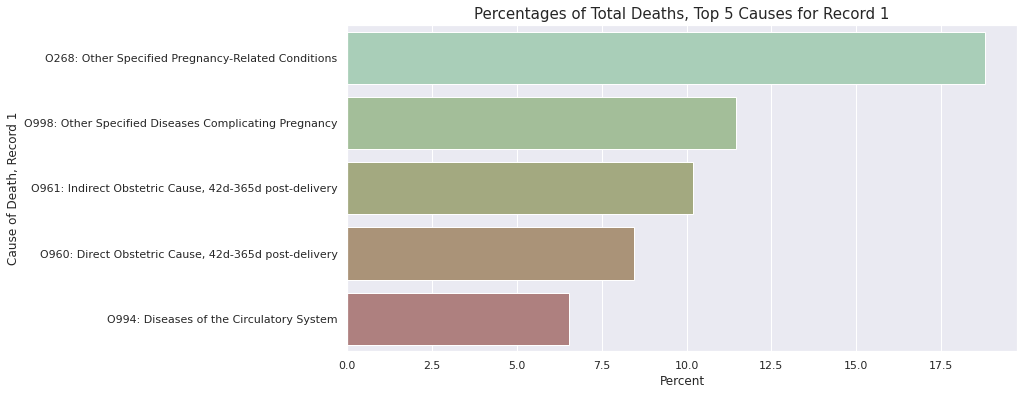

In [953]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=frame, y='Cause', x='Percent of Total Deaths', ax=ax, palette=color_list[5:20:3])
ax.set_title('Percentages of Total Deaths, Top 5 Causes for Record 1', fontdict={'fontsize': 15})
ax.set_xlabel('Percent')
ax.set_ylabel('Cause of Death, Record 1')

In [956]:
def create_sankey_df(df): 
    san = pd.DataFrame(columns=['source', 'target', 'value'])
    top_5 = df.record_1.value_counts(normalize=True)[:5]
    df1 = df[df['record_1']==top_5_all.index[0]]
    df2 = df[df['record_1']==top_5_all.index[1]]
    df3 = df[df['record_1']==top_5_all.index[2]]
    df4 = df[df['record_1']==top_5_all.index[3]]
    df5 = df[df['record_1']==top_5_all.index[4]]
    list_of_dfs = [df1, df2, df3, df4, df5]
    list_of_top_5 = top_5.index
    list_of_causes = []
    list_of_causes.append(list_of_top_5.tolist())
    for i in range(5): 
        san = san.append({'source': 'Top 5 Causes', 'target': top_5.index[i]+'s', 'value': top_5[i]*100}, ignore_index=True)
    for idx, df in enumerate(list_of_dfs): 
        top = df.record_2.value_counts(normalize=True)[:5]
        list_of_causes.append(top.index.tolist())
        for i in range(5): 
            san = san.append({'source': list_of_top_5[idx]+'s', 'target': top.index[i], 'value': top[i]*100}, ignore_index=True)
    list_of_causes = list(set(list(chain.from_iterable(list_of_causes))))
    return san, list_of_causes

In [957]:
san, list_of_causes_all = create_sankey_df(df)

In [958]:
def set_sources_targets_nodes(san): 
    #   set source list from created 'san' df
    source_set = set([x for x in san.source])
    source_list = list(source_set)
    source_map = dict(zip(source_list,range(len(source_list))))
    source_map = {v: k for k, v in source_map.items()}
    #   set target list from created 'san' df
    target_set = set([x for x in san.target[5:]])
    target_list = list(target_set)
    target_map = dict(zip(target_list,range(6, 6+len(target_list))))
    target_map = {v: k for k, v in target_map.items()}
    #   set source list from created 'san' df

    source_nodes_list = source_list + target_list
    #   set nodes map from source & target maps 
    nodes_map = {**source_map, **target_map}
    return source_map, target_map, nodes_map


In [959]:
source_map, target_map, nodes_map = set_sources_targets_nodes(san)

In [960]:
# Sankeys only take numbers; make copy to create coded dataframe for sankey input
san_coded = san.copy()

In [961]:
# replace sources with their numbers 
san_coded.source = san_coded.source.replace(to_replace={v: k for k, v in source_map.items()})

In [962]:
# replace targets with their numbers (first targets then targets that are also sources, e.g. first 5)

san_coded.target = san_coded.target.replace(to_replace={v: k for k, v in target_map.items()})
san_coded.target = san_coded.target.replace(to_replace={v: k for k, v in source_map.items()})

In [963]:
# create nodes dataframe for sankey 
nodes = pd.DataFrame(columns=['ID', 'Label', 'Color'])

In [979]:
# fill in nodes dataframe with Id, label, and color
nodes['ID'] = [k for k, v in nodes_map.items()]
nodes['Label'] = [v for k, v in nodes_map.items()]
# replace values with causes dict to put more information about cause of death on the diagram 
nodes.Label.replace(to_replace=causes_dict, inplace=True)
nodes['Color'] = color_list[:24]

In [981]:
# create the sankey diagram 
fig = go.Figure(data=[go.Sankey(
    valueformat = '.0f', 
    valuesuffix = "%",
    node=dict(
        pad = 15, 
        thickness = 50, 
        line = dict(color= 'black', width = 0.5), 
        label = nodes['Label'], 
        color = nodes['Color']
    ), 
    link = dict(source = san_coded['source'], 
            target = san_coded['target'], 
            value = san_coded['value']
               ))]
)

fig.update_layout(title_text="Sankey Diagram for Top 5 Causes of Maternal Death, All Deaths, 2008-2019", 
                  height = 750, width=1000, font_size=10)
fig.show()

In [189]:
ager27_dict = {8: '10-14 yo', 9: '15-19 yo', 10: '20-24 yo', 11: '25-29 yo', 12: '30-34 yo', 
              13: '35-39 yo', 14: '40-44 yo', 15: '45-49 yo', 16: '50-54 yo', 17: '55-59 yo'}

In [801]:
restat_dict = {1: 'State & County Residence & Occurrence same', 
              2: 'Intrastate Nonresidents; State Same, County Different', 
              3: 'Interstate Nonresidents; State & County Different, both US', 
              4: 'Foreign Residents: State of Occurrence in US, Residence outside US'}

In [802]:
race_dict = {1: 'White', 2: 'Black', 3: 'AmIndian/AlaskaNative', 6: 'NatHaw/OtherPacIsl', 4: 'Asian', 
            5: 'Asian', 7: 'Asian', 18: 'Asian', 28: 'Asian', 38: 'Asian', 
            48: 'Asian', 58: 'NatHaw/OtherPacIsl', 68: 'NatHaw/OtherPacIsl', 
            78: 'NatHaw/OtherPacIsl'}

In [803]:
educ_dict = {1: '8th Gr or less', 2: '9-12 Gr, No Diploma', 
             3: 'HS Grad or GED Completed', 4: 'Some college credit but no Degree',
             5: 'Associate Degree', 6: 'Bachelors Degree', 7: 'Masters Degree', 
             8: 'Doctoral or Professional Degree', 9: 'Unknown'}

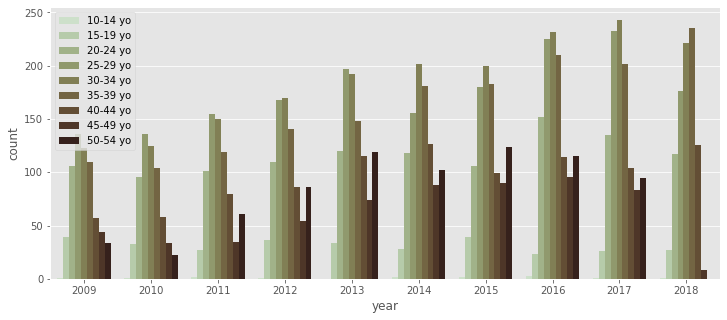

In [196]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.countplot(data=t_ff, x='year', hue='ager27', palette='ch:.85')
ax.legend(labels=[v for k, v in ager27_dict.items()]);

In [982]:
# Records for women ages 10 to 54
ten_fiftyfive = df[df['ager27']<=16]

In [983]:
ten_fiftyfive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9070 entries, 6 to 10560
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     9070 non-null   int64  
 1   restatus  9070 non-null   int64  
 2   educ2003  9070 non-null   float64
 3   monthdth  9070 non-null   int64  
 4   sex       9070 non-null   object 
 5   ager27    9070 non-null   int64  
 6   placdth   9070 non-null   int64  
 7   marstat   9070 non-null   object 
 8   weekday   9070 non-null   int64  
 9   year      9070 non-null   int64  
 10  injwork   9070 non-null   object 
 11  mandeath  9070 non-null   float64
 12  methdisp  9070 non-null   object 
 13  autopsy   9070 non-null   object 
 14  ucod      9070 non-null   object 
 15  ucr113    9070 non-null   int64  
 16  ranum     9070 non-null   int64  
 17  record_1  9070 non-null   object 
 18  record_2  9070 non-null   object 
 19  record_3  9070 non-null   object 
 20  record_4  9070 non-null   obj

In [984]:
ten_fiftyfive.race = ten_fiftyfive.race.replace(to_replace=race_dict)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [985]:
ten_fiftyfive.race.unique()

array(['White', 'Black', 'Asian', 'NatHaw/OtherPacIsl',
       'AmIndian/AlaskaNative'], dtype=object)

In [986]:
over30 = ten_fiftyfive[ten_fiftyfive['ager27']>=12]
over30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5821 entries, 6 to 10559
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     5821 non-null   int64  
 1   restatus  5821 non-null   int64  
 2   educ2003  5821 non-null   float64
 3   monthdth  5821 non-null   int64  
 4   sex       5821 non-null   object 
 5   ager27    5821 non-null   int64  
 6   placdth   5821 non-null   int64  
 7   marstat   5821 non-null   object 
 8   weekday   5821 non-null   int64  
 9   year      5821 non-null   int64  
 10  injwork   5821 non-null   object 
 11  mandeath  5821 non-null   float64
 12  methdisp  5821 non-null   object 
 13  autopsy   5821 non-null   object 
 14  ucod      5821 non-null   object 
 15  ucr113    5821 non-null   int64  
 16  ranum     5821 non-null   int64  
 17  record_1  5821 non-null   object 
 18  record_2  5821 non-null   object 
 19  record_3  5821 non-null   object 
 20  record_4  5821 non-null   obj

In [987]:
over30.race.unique()

array(['White', 'Black', 'NatHaw/OtherPacIsl', 'AmIndian/AlaskaNative',
       'Asian'], dtype=object)

In [988]:
over30_white = over30[over30['race']=='White']

In [989]:
over30_black = over30[over30['race']=='Black']

In [990]:
under30 = ten_fiftyfive[ten_fiftyfive['ager27']<=11]

In [991]:
under30_white = under30[under30['race']=='White']

In [992]:
under30_black = under30[under30['race']=='Black']